# Note:  
V1 
- Add baseline performance by randomization and the highest correlation (Temperature)

In [49]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

seed_no = 572

import warnings
warnings.filterwarnings("ignore")

# Load data

In [38]:
df_trn = pd.read_csv('data/x_train_82.csv', index_col='index')
df_tst = pd.read_csv('data/x_test_82.csv', index_col='index')

In [39]:
print(df_trn.shape, df_tst.shape)
df_trn.head()

(847, 8) (212, 8)


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
index,,,,,,,,
244,6.5,38,1,0,1,0,255,medium
824,6.8,45,0,0,0,1,255,medium
602,5.6,50,0,1,1,1,255,low
347,8.6,55,0,1,1,1,255,low
753,6.6,38,0,0,0,0,255,medium


# Preprocessing function

In [40]:
def encode_label(df_in):
    df_fnc = df_in.copy()
    df_fnc.loc[df_fnc['Grade']=='low', 'Grade'] = 0
    df_fnc.loc[df_fnc['Grade']=='medium', 'Grade'] = 1
    df_fnc.loc[df_fnc['Grade']=='high', 'Grade'] = 2
    df_fnc['Grade'] = df_fnc['Grade'].astype(int)
    
    return df_fnc

df_trn = encode_label(df_trn)
df_tst = encode_label(df_tst)

In [41]:
df_trn.head(2)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
index,,,,,,,,
244,6.5,38,1,0,1,0,255,1
824,6.8,45,0,0,0,1,255,1


In [42]:
# Prepare for training
y_trn = df_trn[['Grade']]
X_trn = df_trn.drop(columns='Grade')

y_tst = df_tst[['Grade']]
X_tst = df_tst.drop(columns='Grade')

print(y_trn.shape, X_trn.shape)
print(y_tst.shape, X_tst.shape)

(847, 1) (847, 7)
(212, 1) (212, 7)


# Baseline

## Random

In [55]:
y_tst['pred_random'] = [random.randint(0, 2) for i in range(y_tst.shape[0])]

In [56]:
print(classification_report(y_tst['Grade'], y_tst['pred_random']))

              precision    recall  f1-score   support

           0       0.42      0.38      0.40        86
           1       0.38      0.33      0.36        75
           2       0.19      0.25      0.22        51

    accuracy                           0.33       212
   macro avg       0.33      0.32      0.33       212
weighted avg       0.35      0.33      0.34       212



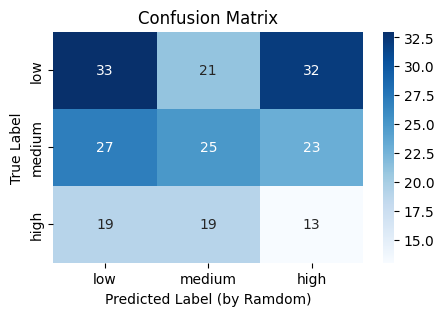

In [57]:
# Get the confusion matrix
conf_matrix = confusion_matrix(y_tst['Grade'], y_tst['pred_random'])

# Display the confusion matrix using a heatmap
class_names = ['low', 'medium', 'high']
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label (by Ramdom)')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Statistic

In [45]:
# based on Temperature (from correlation plot)
df_trn.groupby('Grade').describe()['Temprature'].sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
Grade,,,,,,,,
1,299.0,39.722408,3.660949,34.0,37.0,38.0,45.0,45.0
2,205.0,40.673171,3.718727,35.0,37.0,40.0,45.0,45.0
0,343.0,50.466472,13.495653,34.0,40.0,45.0,55.0,90.0


In [46]:
base_tst = df_tst[['Grade', 'Temprature']]
base_tst.loc[base_tst['Temprature']>((40+45)/2), 'pred_by_temp'] = 0
base_tst.loc[base_tst['Temprature']<=((40+45)/2), 'pred_by_temp'] = 2
base_tst.loc[base_tst['Temprature']<=((40+38)/2), 'pred_by_temp'] = 1

y_tst = y_tst.merge(base_tst[['pred_by_temp']], left_index=True, right_index=True)

In [47]:
print(classification_report(y_tst['Grade'], y_tst['pred_by_temp']))

              precision    recall  f1-score   support

           0       0.60      0.70      0.65        86
           1       0.52      0.56      0.54        75
           2       0.06      0.04      0.05        51

    accuracy                           0.49       212
   macro avg       0.39      0.43      0.41       212
weighted avg       0.44      0.49      0.46       212



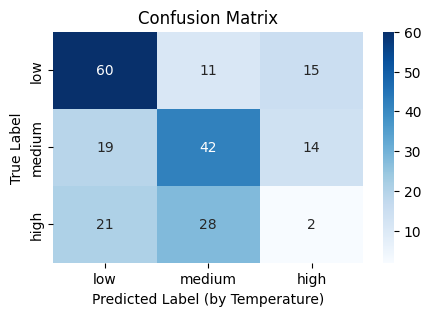

In [53]:
# Get the confusion matrix
conf_matrix = confusion_matrix(y_tst['Grade'], y_tst['pred_by_temp'])

# Display the confusion matrix using a heatmap
class_names = ['low', 'medium', 'high']
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label (by Temperature)')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()